# Hello Home A Local Real Estate Agency of King County 

**Authors:** Monique Hercules 
***

## Overview


An analysis of a local real estate agency in King County for insights on renovation projects to increase home sales. With the knowledge acquired we will be able to predict what type of renovation will impact the sale price of home the best. 

These new insights will help predict the sale budget as well as 

The dataset in use will be from King County. 

## Business Problem

Our stakeholder are local real estate agency that help homeowners buy/sell homes. We will provide evidencial advice about how a  home renovation might increase the estimated value of their homes and by what amount. By targeting this information the real es
tate agency will have highier KPI's 

## Data Understanding 

Import revelant libraries, and inspect data 

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Identifying outlires in price

In [4]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [63]:
# df_preprocessed = df.loc[df['price'] < 1000000]
df_preprocessed = df.copy()

Exploratory Data Analysis for Understanding the Distribution of the Dataset

Checking for Linearity relation for the target variable "Price"

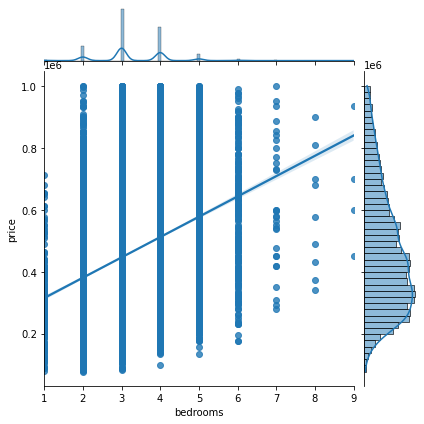

In [64]:
# df_preprocessed = df_preprocessed.loc[df_preprocessed['bedrooms'] < 9]
sns.jointplot(x='bedrooms',y='price' , data=df, kind='reg')
#No linear relation, c
#W Removed outliers 

## Verifying Assumptions for Linear Regression

### Linearity

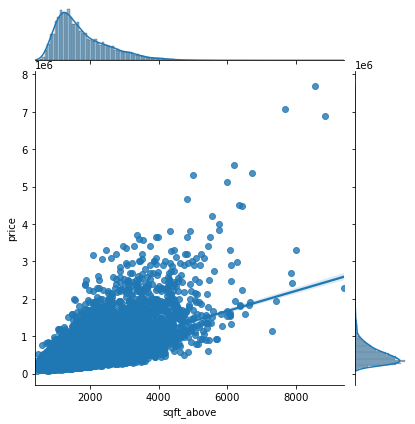

In [7]:

sns.jointplot(x='sqft_above', y='price', data=df, kind='reg' )
#A linear elation, remove outliers 

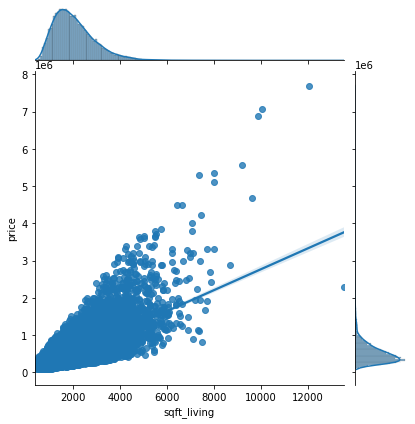

In [8]:
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg' )
#Linear Relation 
#Remove outlier 

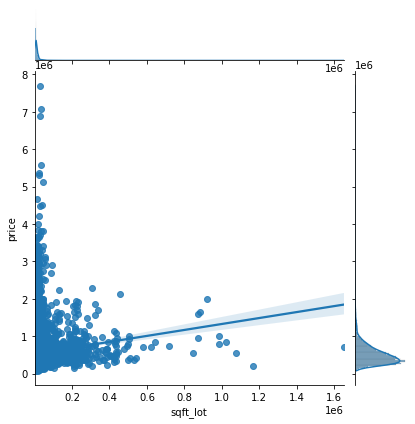

In [9]:
sns.jointplot(x='sqft_lot', y='price', data=df, kind='reg')

#no linear relation, will not be used
#Remove outlier

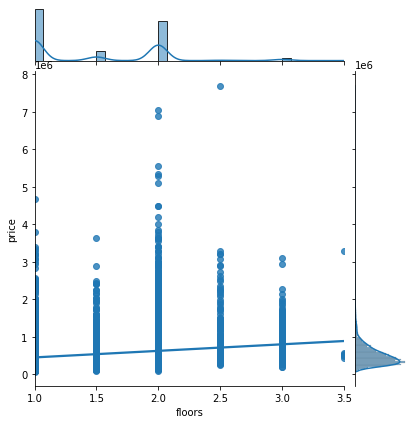

In [10]:
sns.jointplot(x='floors', y='price', data=df, kind='reg')
#No linear relation
#Remove outlier

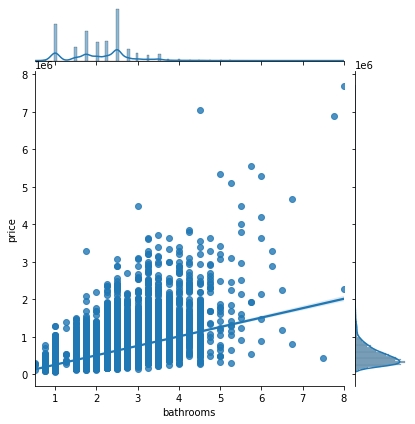

In [11]:
sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')
# plt.scatter(x='bathrooms', y='price', data=df)
#linear relation 
#Remove outlier 

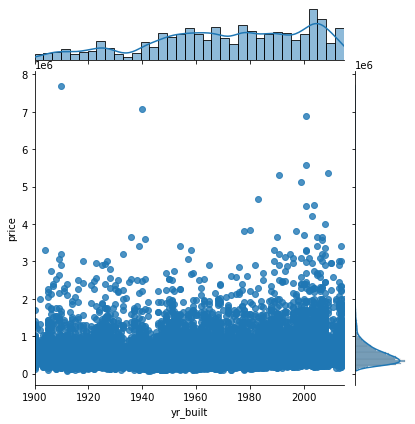

In [12]:
sns.jointplot(x='yr_built', y='price', data=df, kind='reg')
#No Linear relation, will not be used
#Remove outlier 

### Normality

sqft_above


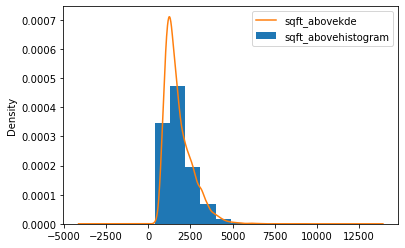

sqft_living


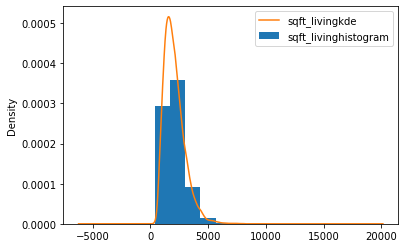

sqft_lot


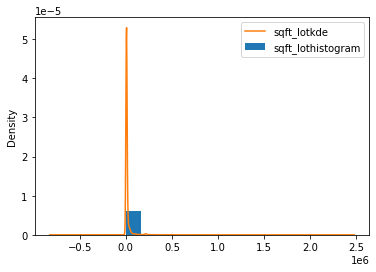

sqft_above


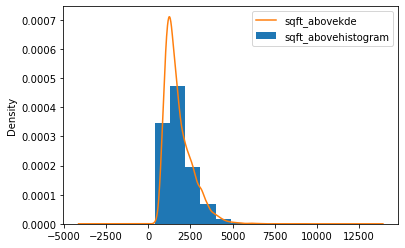

yr_built


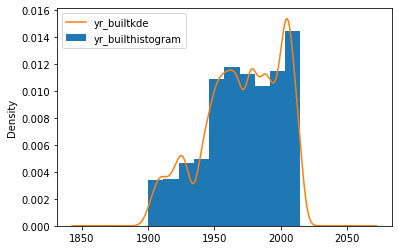

price


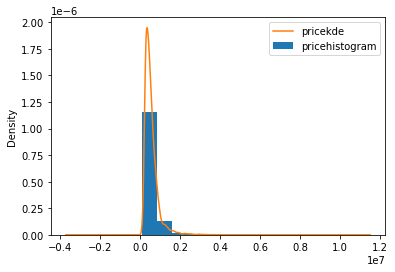

long


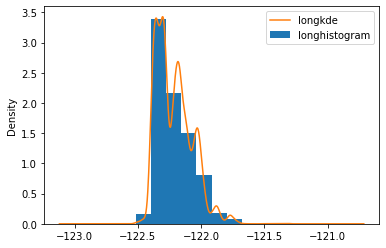

lat


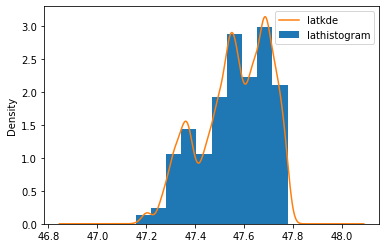

sqft_living15


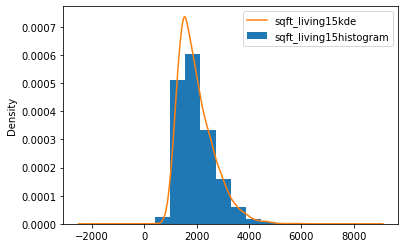

sqft_lot15


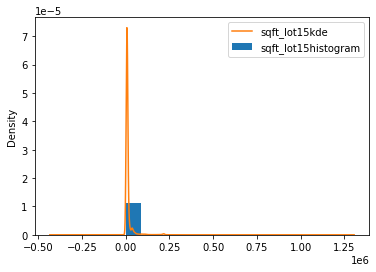

In [40]:
numerical_features = [
    'sqft_above', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'price',
    'long', 'lat', 'sqft_living15', 'sqft_lot15'
]
for column in numerical_features:
    print(column)
    df_preprocessed[column].plot.hist(density=True, label=column + 'histogram')
    df_preprocessed[column].plot.kde(label=column + 'kde')
    plt.legend()
    plt.show()

#### Histogram 

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

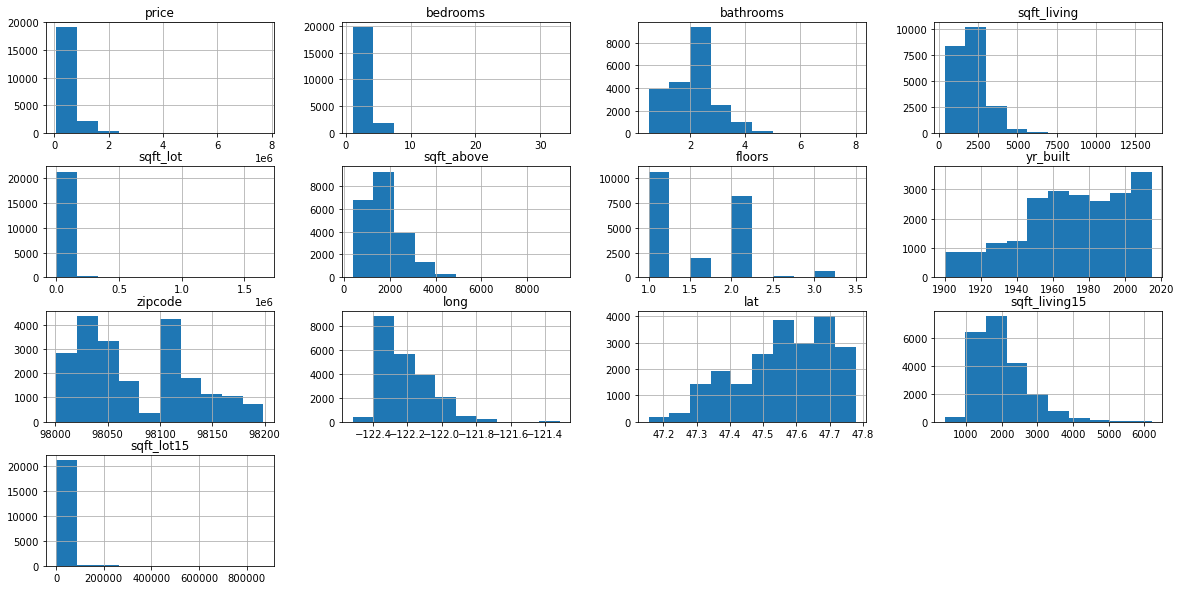

In [42]:
df.hist(column=[
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
    'floors', 'yr_built', 'zipcode', 'long', 'lat', 'sqft_living15',
    'sqft_lot15'
],
        figsize=(20, 10))

In [60]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

#### Q Test

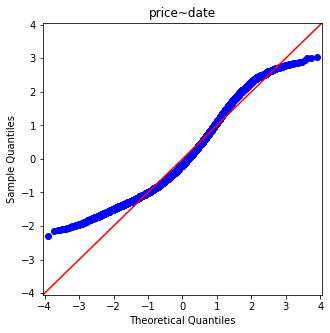

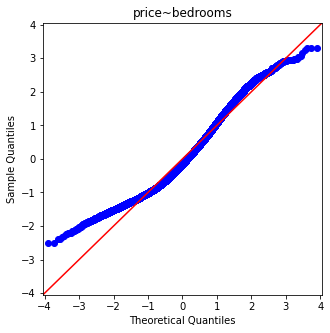

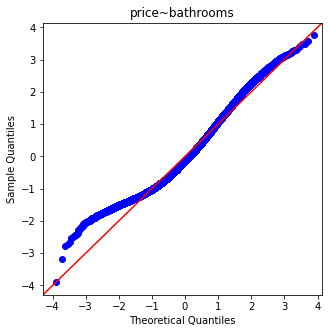

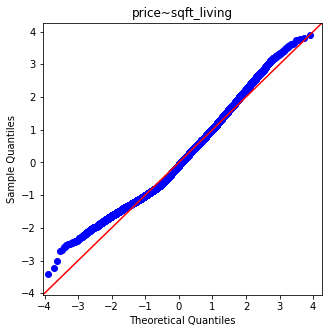

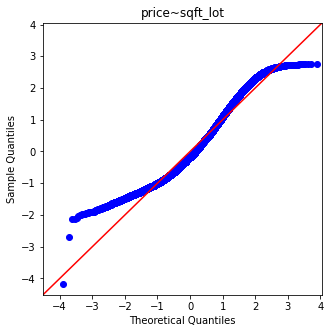

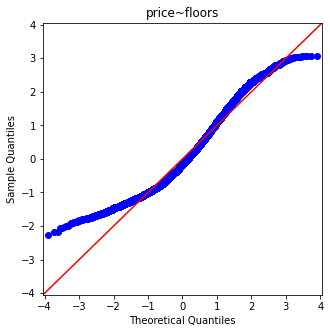

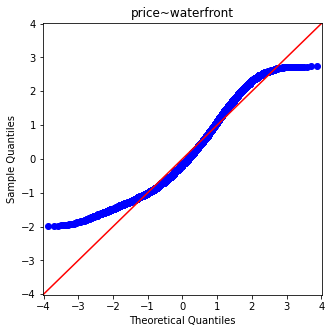

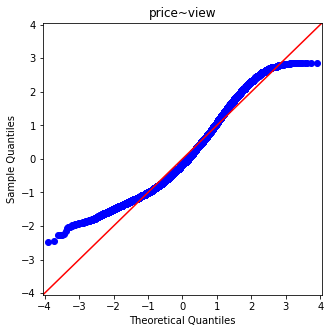

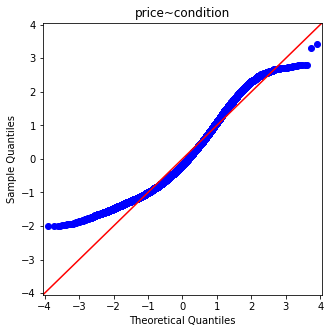

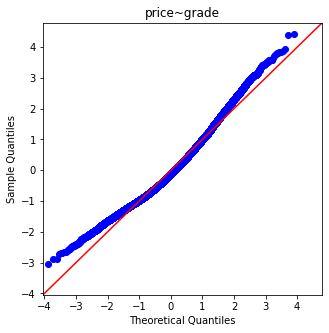

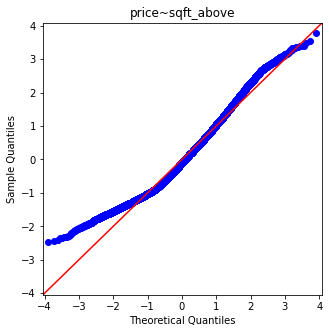

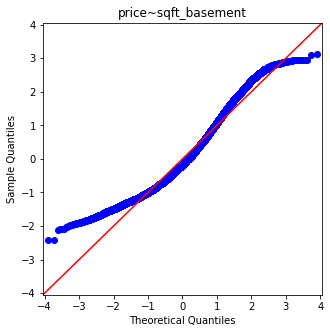

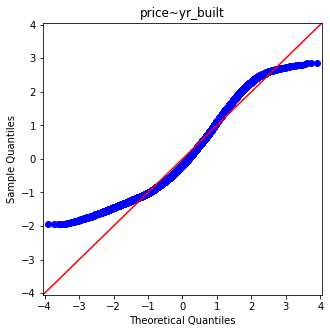

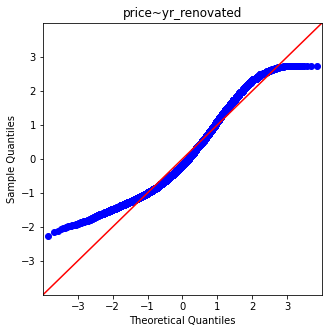

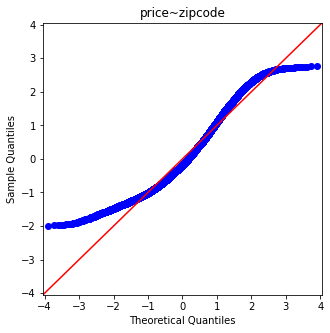

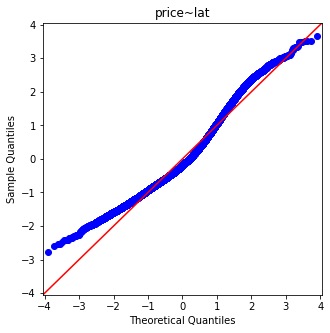

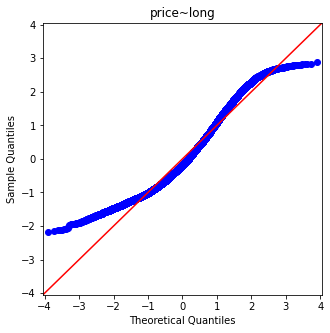

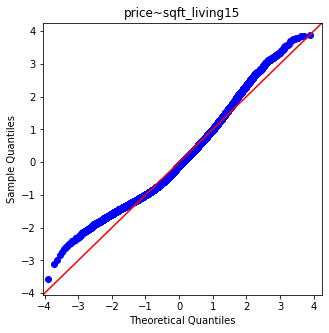

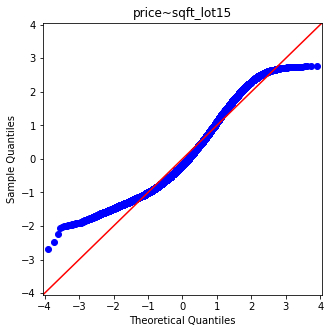

In [65]:
from statsmodels.formula.api import ols
df_preprocessed = pd.read_csv("data/kc_house_data.csv")
df_preprocessed = df_preprocessed.loc[df_preprocessed['price'] < 1_000_000]
df_preprocessed = df_preprocessed.loc[df_preprocessed['bedrooms'] < 10]
df_preprocessed = df_preprocessed.loc[df_preprocessed['bathrooms'] < 10]
outcome = 'price'
for col in df.columns:
    if col == outcome or col == 'id':
        continue
    formula = outcome + '~' + col
    _, ax = plt.subplots(figsize=(5,5))
    ax.set_title(formula)
    model = ols(formula=formula, data=df_preprocessed).fit()
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=ax)

### Homoscedasticity

Used to identify data that has missing data and to determine which data type is each column 

## Cleaning Data 

Fixing issues wrong with data before modeling, for better accuracy. 

## Checking Data Types 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Dropping irrelevant columns 

In [66]:
df_cleaned = df_preprocessed.drop(columns=[
    'id','date', 'floors', 'view', 'waterfront', 'sqft_above', 'lat', 'long',
    'condition', 'sqft_basement', 'yr_built', 'sqft_lot', 'yr_renovated',
    'zipcode', 'sqft_living15', 'sqft_lot15'
])
df_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,grade
0,221900.0,3,1.00,1180,7 Average
1,538000.0,3,2.25,2570,7 Average
2,180000.0,2,1.00,770,6 Low Average
3,604000.0,4,3.00,1960,7 Average
4,510000.0,3,2.00,1680,8 Good


In [67]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20103 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20103 non-null  float64
 1   bedrooms     20103 non-null  int64  
 2   bathrooms    20103 non-null  float64
 3   sqft_living  20103 non-null  int64  
 4   grade        20103 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 942.3+ KB


In [68]:
# df_cleaned = df_cleaned.loc[df_cleaned['waterfront'].notna()]
df_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,grade
0,221900.0,3,1.00,1180,7 Average
1,538000.0,3,2.25,2570,7 Average
2,180000.0,2,1.00,770,6 Low Average
3,604000.0,4,3.00,1960,7 Average
4,510000.0,3,2.00,1680,8 Good


In [69]:
df_cleaned.shape

(20103, 5)

### Checking for missing values 

In [70]:
df_cleaned.isna().sum()
#All the columns that have null values are not going to be used, but dropped earlier on  

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
dtype: int64

In [71]:
df_cleaned.shape 

(20103, 5)

## Checking for multicollinearity 

In [72]:
feats = [
    'bedrooms', 'bathrooms', 'sqft_living'
]
corr = df_cleaned[feats].corr()
corr
# Does Multicollinearity exists between the house features

,bedrooms,bathrooms,sqft_living
bedrooms,1.000000,0.503708,0.605182
bathrooms,0.503708,1.000000,0.711672
sqft_living,0.605182,0.711672,1.000000


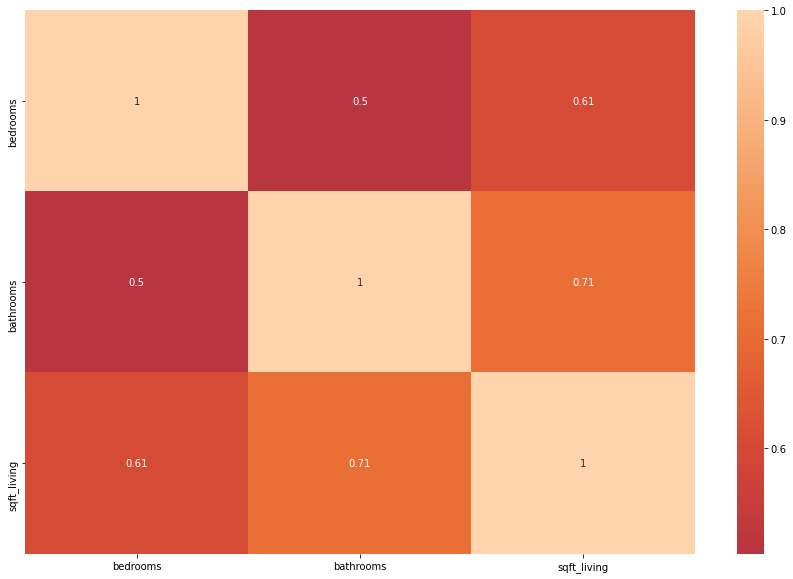

In [73]:
_, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(corr, center=0, annot=True, ax=ax);
#Need to add analysis 

In [74]:
df_temp = df_cleaned.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_temp['pairs'] = list(zip(df_temp.level_0, df_temp.level_1))

df_temp.set_index(['pairs'], inplace = True)

df_temp.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_temp.columns = ['cc']

df_temp.drop_duplicates(inplace=True)

df_temp[(df_temp.cc>.75) & (df_temp.cc<1)]

,cc
pairs,


Dropping bathrooms and sqft above because multi corr 

In [77]:
# corr = df_cleaned_c[feats].corr()
# _, ax = plt.subplots(figsize=(15,10))  
# sns.heatmap(corr, center=0, annot=True, ax=ax);

## Normalizing the Data 

## Determining Numeric and Catagorical features

In [81]:
df_cleaned_c = df_cleaned.copy()

In [82]:
#Saved cleaned data 
df_cleaned_c.to_csv("data/kc_house_data_cleaned.csv", index=False)

 ## One Hot Encoding

This is preprocessing 

In [83]:

# df_categorical_cleaned = df_cleaned['floors']
# df_categorical_cleaned = pd.get_dummies(df_categorical_cleaned, drop_first=True)
# df_categorical_cleaned.head()


df_categorical_cleaned = pd.get_dummies(df_cleaned_c, columns=['bathrooms', 'bedrooms', 'grade'])
df_categorical_cleaned.columns = df_categorical_cleaned.columns.str.replace('.', '_')
df_categorical_cleaned.columns = df_categorical_cleaned.columns.str.replace(' ', '_')
df_categorical_cleaned.columns

Index(['price', 'sqft_living', 'bathrooms_0_5', 'bathrooms_0_75',
       'bathrooms_1_0', 'bathrooms_1_25', 'bathrooms_1_5', 'bathrooms_1_75',
       'bathrooms_2_0', 'bathrooms_2_25', 'bathrooms_2_5', 'bathrooms_2_75',
       'bathrooms_3_0', 'bathrooms_3_25', 'bathrooms_3_5', 'bathrooms_3_75',
       'bathrooms_4_0', 'bathrooms_4_25', 'bathrooms_4_5', 'bathrooms_4_75',
       'bathrooms_5_0', 'bathrooms_5_25', 'bathrooms_5_5', 'bathrooms_5_75',
       'bathrooms_6_0', 'bathrooms_6_75', 'bathrooms_7_5', 'bedrooms_1',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'grade_10_Very_Good',
       'grade_11_Excellent', 'grade_12_Luxury', 'grade_3_Poor', 'grade_4_Low',
       'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better'],
      dtype='object')

## Modeling 

Fitting the Initial Model 

In [771]:
outcome = 'price'
x_cols = ['lat', 'long', 'floors_1_0', 'floors_1_5',
       'floors_2_0', 'floors_2_5', 'floors_3_0', 'floors_3_5',
       'condition_Average', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very_Good', 'bathrooms_0_5',
       'bathrooms_0_75', 'bathrooms_1_0', 'bathrooms_1_25', 'bathrooms_1_5',
       'bathrooms_1_75', 'bathrooms_2_0', 'bathrooms_2_25', 'bathrooms_2_5',
       'bathrooms_2_75', 'bathrooms_3_0', 'bathrooms_3_25', 'bathrooms_3_5',
       'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25', 'bathrooms_4_5',
       'bathrooms_4_75', 'bathrooms_5_0', 'bathrooms_5_25', 'bathrooms_5_5',
       'bathrooms_5_75', 'bathrooms_6_0', 'bathrooms_6_75', 'bedrooms_1',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bedrooms_7', 'bedrooms_8', 'grade_10_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_3_Poor', 'grade_4_Low', 'grade_5_Fair',
       'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good',
       'grade_9_Better']
#change x_cols for intial model 
#Need to add floors back after the merge, 

In [772]:
from statsmodels.formula.api import ols 

In [773]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=df_categorical_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     551.3
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        22:03:15   Log-Likelihood:            -2.3472e+05
No. Observations:               17872   AIC:                         4.695e+05
Df Residuals:                   17821   BIC:                         4.699e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.748e+07   5.48e+05    -31.904      0.000   -1.86e+07   -1.64e+07
lat                  5.587e+05   6702.293     83.367      0.000    5.46e+05    5.72e+05
long                -2.106e+04   7075.031     -2.976      0.003   -3.49e+04   -7187.266
floors_1_0          -2.916e+06   9.14e+04    -31.912      0.000    -3.1e+06   -2.74e+06
floors_1_5          -2.852e+06   9.17e+04    -31.091      0.000   -3.03e+06   -2.67e+06
floors_2_0          -2.915e+06   9.11e+04    -31.989      0.000   -3.09e+06   -2.74e+06
floors_2_5          -2.862e+06   9.22e+04    -31.037      0.000   -3.04e+06   -2.68e+06
floors_3_0          -2.969e+06   9.24e+04    -32.119      0.000   -3.15e+06   -2.79e+06
floors_3_5          -2.967e+06   1.03e+05    -28.806      0.000   -3.17e+06   -2.76e+06
condition_Average   -3.518e+06    1.1e+05    -32.089      0.000   -3.73e+06    -3.3e+06
condition_Fair      -3.531e+06    1.1e+05    -32.148      0.000   -3.75e+06   -3.32e+06
condition_Good      -3.473e+06    1.1e+05    -31.686      0.000   -3.69e+06   -3.26e+06
condition_Poor      -3.523e+06   1.12e+05    -31.511      0.000   -3.74e+06    -3.3e+06
condition_Very_Good -3.437e+06    1.1e+05    -31.301      0.000   -3.65e+06   -3.22e+06
bathrooms_0_5       -8.761e+05   6.47e+04    -13.550      0.000      -1e+06   -7.49e+05
bathrooms_0_75      -7.897e+05   3.09e+04    -25.594      0.000    -8.5e+05   -7.29e+05
bathrooms_1_0       -8.009e+05   2.69e+04    -29.825      0.000   -8.53e+05   -7.48e+05
bathrooms_1_25      -8.478e+05    5.5e+04    -15.420      0.000   -9.56e+05    -7.4e+05
bathrooms_1_5       -7.875e+05   2.68e+04    -29.375      0.000    -8.4e+05   -7.35e+05
bathrooms_1_75      -7.632e+05   2.66e+04    -28.679      0.000   -8.15e+05   -7.11e+05
bathrooms_2_0       -7.605e+05   2.66e+04    -28.543      0.000   -8.13e+05   -7.08e+05
bathrooms_2_25      -7.595e+05   2.65e+04    -28.639      0.000   -8.12e+05   -7.08e+05
bathrooms_2_5        -7.52e+05   2.62e+04    -28.655      0.000   -8.03e+05   -7.01e+05
bathrooms_2_75      -7.224e+05   2.66e+04    -27.193      0.000   -7.75e+05    -6.7e+05
bathrooms_3_0       -7.241e+05   2.69e+04    -26.876      0.000   -7.77e+05   -6.71e+05
bathrooms_3_25      -6.989e+05   2.72e+04    -25.738      0.000   -7.52e+05   -6.46e+05
bathrooms_3_5       -6.828e+05    2.7e+04    -25.336      0.000   -7.36e+05    -6.3e+05
bathrooms_3_75      -6.425e+05   3.05e+04    -21.086      0.000   -7.02e+05   -5.83e+05
bathrooms_4_0       -6.723e+05   3.11e+04    -21.617      0.000   -7.33e+05   -6.11e+05
bathrooms_4_25      -5.983e+05   3.52e+04    -16.999      0.000   -6.67e+05   -5.29e+05
bathrooms_4_5       -6.708e+05   3.24e+04    -20.724      0.000   -7.34e+05   -6.07e+05
bathrooms_4_75      -6.288e+05   6.43e+04     -9.780      0.000   -7.55e+05   -5.03e+05
bat

## Initial Refinement 

In [774]:
# Removing P values greater than 0.05
# x_cols.remove('bathrooms_3_75')
# x_cols.remove('bathrooms_4_5')
# x_cols.remove('bathrooms_5_75')
# x_cols.remove('bathrooms_6_5')
# x_cols.remove('bathrooms_8_0')
# x_cols.remove('grade_9_Better')

In [775]:

#bedrooms
#change x_cols for intial refinement model 
#Add floors, removed bedrooms from the 6, its 5 with floors. -5 
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=df_categorical_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     551.3
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        22:03:27   Log-Likelihood:            -2.3472e+05
No. Observations:               17872   AIC:                         4.695e+05
Df Residuals:                   17821   BIC:                         4.699e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.748e+07   5.48e+05    -31.904      0.000   -1.86e+07   -1.64e+07
lat                  5.587e+05   6702.293     83.367      0.000    5.46e+05    5.72e+05
long                -2.106e+04   7075.031     -2.976      0.003   -3.49e+04   -7187.266
floors_1_0          -2.916e+06   9.14e+04    -31.912      0.000    -3.1e+06   -2.74e+06
floors_1_5          -2.852e+06   9.17e+04    -31.091      0.000   -3.03e+06   -2.67e+06
floors_2_0          -2.915e+06   9.11e+04    -31.989      0.000   -3.09e+06   -2.74e+06
floors_2_5          -2.862e+06   9.22e+04    -31.037      0.000   -3.04e+06   -2.68e+06
floors_3_0          -2.969e+06   9.24e+04    -32.119      0.000   -3.15e+06   -2.79e+06
floors_3_5          -2.967e+06   1.03e+05    -28.806      0.000   -3.17e+06   -2.76e+06
condition_Average   -3.518e+06    1.1e+05    -32.089      0.000   -3.73e+06    -3.3e+06
condition_Fair      -3.531e+06    1.1e+05    -32.148      0.000   -3.75e+06   -3.32e+06
condition_Good      -3.473e+06    1.1e+05    -31.686      0.000   -3.69e+06   -3.26e+06
condition_Poor      -3.523e+06   1.12e+05    -31.511      0.000   -3.74e+06    -3.3e+06
condition_Very_Good -3.437e+06    1.1e+05    -31.301      0.000   -3.65e+06   -3.22e+06
bathrooms_0_5       -8.761e+05   6.47e+04    -13.550      0.000      -1e+06   -7.49e+05
bathrooms_0_75      -7.897e+05   3.09e+04    -25.594      0.000    -8.5e+05   -7.29e+05
bathrooms_1_0       -8.009e+05   2.69e+04    -29.825      0.000   -8.53e+05   -7.48e+05
bathrooms_1_25      -8.478e+05    5.5e+04    -15.420      0.000   -9.56e+05    -7.4e+05
bathrooms_1_5       -7.875e+05   2.68e+04    -29.375      0.000    -8.4e+05   -7.35e+05
bathrooms_1_75      -7.632e+05   2.66e+04    -28.679      0.000   -8.15e+05   -7.11e+05
bathrooms_2_0       -7.605e+05   2.66e+04    -28.543      0.000   -8.13e+05   -7.08e+05
bathrooms_2_25      -7.595e+05   2.65e+04    -28.639      0.000   -8.12e+05   -7.08e+05
bathrooms_2_5        -7.52e+05   2.62e+04    -28.655      0.000   -8.03e+05   -7.01e+05
bathrooms_2_75      -7.224e+05   2.66e+04    -27.193      0.000   -7.75e+05    -6.7e+05
bathrooms_3_0       -7.241e+05   2.69e+04    -26.876      0.000   -7.77e+05   -6.71e+05
bathrooms_3_25      -6.989e+05   2.72e+04    -25.738      0.000   -7.52e+05   -6.46e+05
bathrooms_3_5       -6.828e+05    2.7e+04    -25.336      0.000   -7.36e+05    -6.3e+05
bathrooms_3_75      -6.425e+05   3.05e+04    -21.086      0.000   -7.02e+05   -5.83e+05
bathrooms_4_0       -6.723e+05   3.11e+04    -21.617      0.000   -7.33e+05   -6.11e+05
bathrooms_4_25      -5.983e+05   3.52e+04    -16.999      0.000   -6.67e+05   -5.29e+05
bathrooms_4_5       -6.708e+05   3.24e+04    -20.724      0.000   -7.34e+05   -6.07e+05
bathrooms_4_75      -6.288e+05   6.43e+04     -9.780      0.000   -7.55e+05   -5.03e+05
bat

## Checking for Mulitcollinearity for initial model 

In [777]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [778]:
X = df_categorical_cleaned[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(X, vif))

[('lat', 1.0770947552017036),
 ('long', 1.2109918250797451),
 ('floors_1_0', inf),
 ('floors_1_5', inf),
 ('floors_2_0', inf),
 ('floors_2_5', inf),
 ('floors_3_0', inf),
 ('floors_3_5', inf),
 ('condition_Average', inf),
 ('condition_Fair', inf),
 ('condition_Good', inf),
 ('condition_Poor', inf),
 ('condition_Very_Good', inf),
 ('bathrooms_0_5', inf),
 ('bathrooms_0_75', inf),
 ('bathrooms_1_0', inf),
 ('bathrooms_1_25', inf),
 ('bathrooms_1_5', inf),
 ('bathrooms_1_75', inf),
 ('bathrooms_2_0', inf),
 ('bathrooms_2_25', inf),
 ('bathrooms_2_5', inf),
 ('bathrooms_2_75', inf),
 ('bathrooms_3_0', inf),
 ('bathrooms_3_25', inf),
 ('bathrooms_3_5', inf),
 ('bathrooms_3_75', inf),
 ('bathrooms_4_0', inf),
 ('bathrooms_4_25', inf),
 ('bathrooms_4_5', inf),
 ('bathrooms_4_75', inf),
 ('bathrooms_5_0', inf),
 ('bathrooms_5_25', inf),
 ('bathrooms_5_5', inf),
 ('bathrooms_5_75', inf),
 ('bathrooms_6_0', inf),
 ('bathrooms_6_75', inf),
 ('bedrooms_1', inf),
 ('bedrooms_2', inf),
 ('bedrooms_3

In [781]:
def varianceCheck(variance_inflation):
    cols = []
    for col, val in variance_inflation:
        if val < 10:
            cols.append(col)
    return cols

x_cols_variance = varianceCheck(list(zip(x_cols, vif)))
#change for the original one 
x_cols_variance

['lat', 'long']

In [782]:
outcome = 'price'

#Bedrooms, 
#change x_cols for refinement model 

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=df_categorical_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     551.3
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        22:03:42   Log-Likelihood:            -2.3472e+05
No. Observations:               17872   AIC:                         4.695e+05
Df Residuals:                   17821   BIC:                         4.699e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.748e+07   5.48e+05    -31.904      0.000   -1.86e+07   -1.64e+07
lat                  5.587e+05   6702.293     83.367      0.000    5.46e+05    5.72e+05
long                -2.106e+04   7075.031     -2.976      0.003   -3.49e+04   -7187.266
floors_1_0          -2.916e+06   9.14e+04    -31.912      0.000    -3.1e+06   -2.74e+06
floors_1_5          -2.852e+06   9.17e+04    -31.091      0.000   -3.03e+06   -2.67e+06
floors_2_0          -2.915e+06   9.11e+04    -31.989      0.000   -3.09e+06   -2.74e+06
floors_2_5          -2.862e+06   9.22e+04    -31.037      0.000   -3.04e+06   -2.68e+06
floors_3_0          -2.969e+06   9.24e+04    -32.119      0.000   -3.15e+06   -2.79e+06
floors_3_5          -2.967e+06   1.03e+05    -28.806      0.000   -3.17e+06   -2.76e+06
condition_Average   -3.518e+06    1.1e+05    -32.089      0.000   -3.73e+06    -3.3e+06
condition_Fair      -3.531e+06    1.1e+05    -32.148      0.000   -3.75e+06   -3.32e+06
condition_Good      -3.473e+06    1.1e+05    -31.686      0.000   -3.69e+06   -3.26e+06
condition_Poor      -3.523e+06   1.12e+05    -31.511      0.000   -3.74e+06    -3.3e+06
condition_Very_Good -3.437e+06    1.1e+05    -31.301      0.000   -3.65e+06   -3.22e+06
bathrooms_0_5       -8.761e+05   6.47e+04    -13.550      0.000      -1e+06   -7.49e+05
bathrooms_0_75      -7.897e+05   3.09e+04    -25.594      0.000    -8.5e+05   -7.29e+05
bathrooms_1_0       -8.009e+05   2.69e+04    -29.825      0.000   -8.53e+05   -7.48e+05
bathrooms_1_25      -8.478e+05    5.5e+04    -15.420      0.000   -9.56e+05    -7.4e+05
bathrooms_1_5       -7.875e+05   2.68e+04    -29.375      0.000    -8.4e+05   -7.35e+05
bathrooms_1_75      -7.632e+05   2.66e+04    -28.679      0.000   -8.15e+05   -7.11e+05
bathrooms_2_0       -7.605e+05   2.66e+04    -28.543      0.000   -8.13e+05   -7.08e+05
bathrooms_2_25      -7.595e+05   2.65e+04    -28.639      0.000   -8.12e+05   -7.08e+05
bathrooms_2_5        -7.52e+05   2.62e+04    -28.655      0.000   -8.03e+05   -7.01e+05
bathrooms_2_75      -7.224e+05   2.66e+04    -27.193      0.000   -7.75e+05    -6.7e+05
bathrooms_3_0       -7.241e+05   2.69e+04    -26.876      0.000   -7.77e+05   -6.71e+05
bathrooms_3_25      -6.989e+05   2.72e+04    -25.738      0.000   -7.52e+05   -6.46e+05
bathrooms_3_5       -6.828e+05    2.7e+04    -25.336      0.000   -7.36e+05    -6.3e+05
bathrooms_3_75      -6.425e+05   3.05e+04    -21.086      0.000   -7.02e+05   -5.83e+05
bathrooms_4_0       -6.723e+05   3.11e+04    -21.617      0.000   -7.33e+05   -6.11e+05
bathrooms_4_25      -5.983e+05   3.52e+04    -16.999      0.000   -6.67e+05   -5.29e+05
bathrooms_4_5       -6.708e+05   3.24e+04    -20.724      0.000   -7.34e+05   -6.07e+05
bathrooms_4_75      -6.288e+05   6.43e+04     -9.780      0.000   -7.55e+05   -5.03e+05
bat

In [783]:
X = df_categorical_cleaned[x_cols_variance]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols_variance, vif))
#change for the new one 

[('lat', 107030.05059729518), ('long', 107030.05059729518)]

In [765]:
outcome = 'price'
# x_cols = ['bathrooms','sqft_above','sqft_living','sqft_lot',
#           'yr_built','floors_2_5',
#           'floors_3_0','floors_1_0','floors_1_5', 'floors_2_0','floors_3_5']
#change x_cols for refinement model 2 
predictors = '+'.join(x_cols_variance)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=df_categorical_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     7658.
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        22:00:44   Log-Likelihood:            -2.3569e+05
No. Observations:               17872   AIC:                         4.714e+05
Df Residuals:                   17868   BIC:                         4.714e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.507e+07   8.91e+05    -39.360      0.000   -3.68e+07   -3.33e+07
sqft_living   159.4060      1.341    118.870      0.000     156.778     162.035
lat          6.019e+05   6873.677     87.566      0.000    5.88e+05    6.15e+05
long        -5.398e+04   7154.975     -7.544      0.000    -6.8e+04      -4e+04
==============================================================================
Omnibus:                     1125.764   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1522.783
Skew:                           0.571   Prob(JB):                         0.00
Kurtosis:                       3.860   Cond. No.                     1.93e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Check for Normality 

In [766]:
import statsmodels.api as sm 
import scipy.stats as stats 

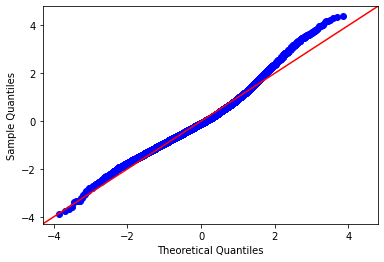

In [767]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True )

## Checking for Homoscedasticity 

In [664]:
plt.scatter(model.predict(df_cleaned[x_cols]), model.resid)
plt.plot(model.predict(df_cleaned[x_cols]),[0 for i in range(len(df_cleaned))])

KeyError: "None of [Index(['floors_1_0', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',\n       'floors_3_5', 'condition_Average', 'condition_Fair', 'condition_Good',\n       'condition_Poor', 'condition_Very_Good', 'bedrooms_1', 'bedrooms_2',\n       'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7',\n       'bedrooms_8', 'bathrooms_0_5', 'bathrooms_0_75', 'bathrooms_1_0',\n       'bathrooms_1_25', 'bathrooms_1_5', 'bathrooms_1_75', 'bathrooms_2_0',\n       'bathrooms_2_25', 'bathrooms_2_5', 'bathrooms_2_75', 'bathrooms_3_0',\n       'bathrooms_3_25', 'bathrooms_3_5', 'bathrooms_4_0', 'bathrooms_4_25',\n       'bathrooms_4_75', 'bathrooms_5_0', 'bathrooms_5_25', 'bathrooms_5_5',\n       'bathrooms_6_0', 'bathrooms_6_25', 'bathrooms_6_75',\n       'grade_10_Very_Good', 'grade_11_Excellent', 'grade_12_Luxury',\n       'grade_13_Mansion', 'grade_3_Poor', 'grade_4_Low', 'grade_5_Fair',\n       'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good'],\n      dtype='object')] are in the [columns]"

## Data Modeling


## Model Refinement 3 

In [ ]:
#Finding a cutoff point 
for i in range (90,99):
    q = i/100
    print('{} percentile:{}'.format(q, normalized_df['price'].quantile(q=q)))

In [ ]:
subset = normalized_df[normalized_df['price'] <38]
print ("Percent removed:", len(normalized_df)- len(subset))/len(normalized_df)
outcome = 'price'
x_cols = x_cols = ['bathrooms','bedrooms']
#change x_cols for refinement model 2 
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=normalized_df).fit()
model.summary()

## Rechecking Normality 

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True )

## Rechecking Homoscedasticity

In [ ]:
plt.scatter(model.predict(normalized_df[x_cols]), model.resid)
plt.plot(model.predict(normalized_df[x_cols]),[0 for i in range(len(normalized_df))])

In [ ]:
y = normalized_df['price']
X = normalized_df.drop('price',axis=1)

 The prediction target for this analysis is the , so we are going to split the data into two sets fro training and testing 

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state =42)

For this project, you will use multiple linear regression modeling to analyze house sales in a northwestern county.

Key Points

## Regression Results 

## Conclusion


Recommendations 

## Next Steps 